-------------------------------------------------------------------
### Final Exam Part B

### CSCN8000 –Artificial Intelligence Algorithms and Mathematics

#### Name : Pradeepti Kasam

#### Student Number : 8965985

#### Section Number : 2
--------------------------------------------------------------------

**Data Set - Fashion MNIST . . . with a Twist!**

In [1]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

##### **Part A: Model Training and Evaluation** #####

- Choose a shallow (simple) classification baseline model from the ones mentioned in class after the midterm. A shallow classifier is one that doesn’t generate a complex      decision boundary. We will use this classifier in the following points. Include a comment on why you choose this particular classifier and why is it considered shallow.

Amongst the classification techniques, I chose **decision trees** because it is simple, interpretable, and creates clear decision boundaries based on feature splits. It is considered shallow when restricted to a small depth, as it avoids complex decision boundaries, generalizing well to capture essential patterns without overfitting.

In [3]:
#To read the dataset
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


- Train the chosen baseline model on the training set. Make sure to use 5-fold cross-validation to
properly judge the performance of the model on a validation set.


In [6]:
# Initializing the decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

#To train the model using training dataset
dt_model.fit(x_train, y_train)

# To Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy')

# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {(cv_scores.mean() * 100):.2f}%")

Cross-validation scores: [0.68891667 0.69041667 0.69233333 0.69075    0.68716667]
Mean accuracy: 68.99%


- Utilize the bagging method, with the base estimator being the model chosen in the first step, to do a training run on the training set. Make sure to use 5-fold cross-validation to properly judge the performance of the model on a validation set.

In [7]:
#To ensure that the target labels are in a 1D array format
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [8]:
# Initializing the BaggingClassifier with the estimator as the decision tree
bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=20, random_state=42)

# Fitting the Bagging model on the training set
bagging_model.fit(x_train, y_train)

# Performing 5-fold cross-validation on the training set
cv_scores = cross_val_score(bagging_model, x_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {(cv_scores.mean() * 100):.2f}%")


Cross-validation scores: [0.69616667 0.69866667 0.69958333 0.69833333 0.698     ]
Mean CV accuracy: 69.81%


- Utilize the boosting method, with the base estimator being the model chosen in the first step, to
do a training run on the training set. Make sure to use 5-fold cross-validation to properly judge
the performance of the model on a validation set.

In [9]:
# Initializing the AdaBoostClassifier with the estimator as decision tree
adaboost_model = AdaBoostClassifier(estimator=dt_model, n_estimators=20, random_state=42, algorithm="SAMME")

# Fitting the AdaBoost model on the training set
adaboost_model.fit(x_train, y_train)

# Performing 5-fold cross-validation on the training set
cv_scores = cross_val_score(adaboost_model, x_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {(cv_scores.mean() * 100):.2f}%")

Cross-validation scores: [0.78383333 0.78158333 0.78533333 0.79891667 0.77991667]
Mean CV accuracy: 78.59%


- Validate the trained baseline model, trained bagging and boosting models on the testing set and
compare their performance. Include a comment on which method worked better and a possible
reasoning behind the observations

In [10]:
#base model
# Making predictions on the test set
y_pred_base = dt_model.predict(x_test)
# Calculating accuracy
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Test Accuracy for base model: {(accuracy_base * 100):.2f}%")

# Bagging model
# Making predictions on the test set
y_pred_bagging = bagging_model.predict(x_test)
# Calculating accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Test Accuracy for bagging model: {(accuracy_bagging * 100):.2f}%")

#boosting model
# Making predictions on the test set
y_pred_boost = adaboost_model.predict(x_test)
# Calculate the accuracy on the test set
accuracy_boost = accuracy_score(y_test, y_pred_boost)
print(f"Test accuracy for boosting model: {(accuracy_boost * 100):.2f}%")

Test Accuracy for base model: 68.77%
Test Accuracy for bagging model: 69.04%
Test accuracy for boosting model: 79.63%


In [11]:
# Comparison
if accuracy_base > accuracy_bagging and accuracy_base > accuracy_boost:
    best_model = "Decision Tree"
elif accuracy_bagging > accuracy_base and accuracy_bagging > accuracy_boost:
    best_model = "Bagging"
else:
    best_model = "Boosting"

print(f"The best performing model is: {best_model}")

The best performing model is: Boosting


Observations :

- Out of all three models, Boosting model has highest accuracy (79.63%). This indicates that boosting effectively reduces bias and improves model performance

- The bagging model shows a slight improvement over the base model, increasing test accuracy by only 0.27%. This suggests that while bagging reduces variance, it may not sufficiently address the bias present in the dataset or base model.

##### **Part B: Guessing the Mystery Label** ####

• Train a simple neural network (MLP) with 3 hidden layers having the following number of neurons [256,128,64] on the training set. Make sure to normalize the data beforehand with z-score normalization.

• Utilize the uploaded helper code in “helper.py” to generate an embeddings matrix representing the output of the last hidden layer in the MLP for the test dataset

In [18]:
from helper import get_hidden_layer_activations

# Normalizing data using z-score normalization
scaler = StandardScaler()
x_train_normalised = scaler.fit_transform(x_train)
x_test_normalised = scaler.transform(x_test)

# To Initialize and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', max_iter=200, random_state=42)
mlp.fit(x_train_normalised, y_train)

# To Evaluate the model on the test set
y_pred = mlp.predict(x_test_normalised)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for MLP model : {(accuracy * 100):.2f}%")

# To Generate embeddings matrix from the last hidden layer
# Index of the last hidden layer (zero-based indexing)
last_hidden_layer_index = 2 
embeddings = get_hidden_layer_activations(mlp, x_test_normalised, last_hidden_layer_index)

Test Accuracy for MLP model : 92.17%


In [19]:
#printing the shape of the embeddings matrix
print("shape of the embeddings matrix: ", embeddings.shape)

#print the first 5 rows of the embeddings matrix
print("\n Embeddings matrix: ")
print(embeddings[:5])

shape of the embeddings matrix:  (10000, 64)

 Embeddings matrix: 
[[0.00000000e+00 2.17596821e+00 0.00000000e+00 0.00000000e+00
  9.91126351e-01 0.00000000e+00 7.22425102e+00 0.00000000e+00
  1.47019957e+00 1.29946203e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.02792126e+00 0.00000000e+00 0.00000000e+00 2.09252818e+00
  1.53792069e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.06795003e+01 0.00000000e+00 2.06892038e+00
  4.88381351e+00 1.31604953e+01 0.00000000e+00 7.24870246e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.44355264e+00 7.51465414e+00 4.50191109e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.35203526e+00 0.00000000e+00
  1.37077583e+00 0.00000000e+00 0.00000000e+00 7.91439842e+00
  1.50635585e+01 0.00000000e+00 1.17262975e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0

 - Carry out PCA and LDA to reduce the dimensionality of the generated embeddings to 2. Produce a plot of the data in two dimensions for PCA and LDA, using easily distinguishable colours and markers to indicate the labels of each datapoint. Include a comment on any interesting patterns you see in the two plots.

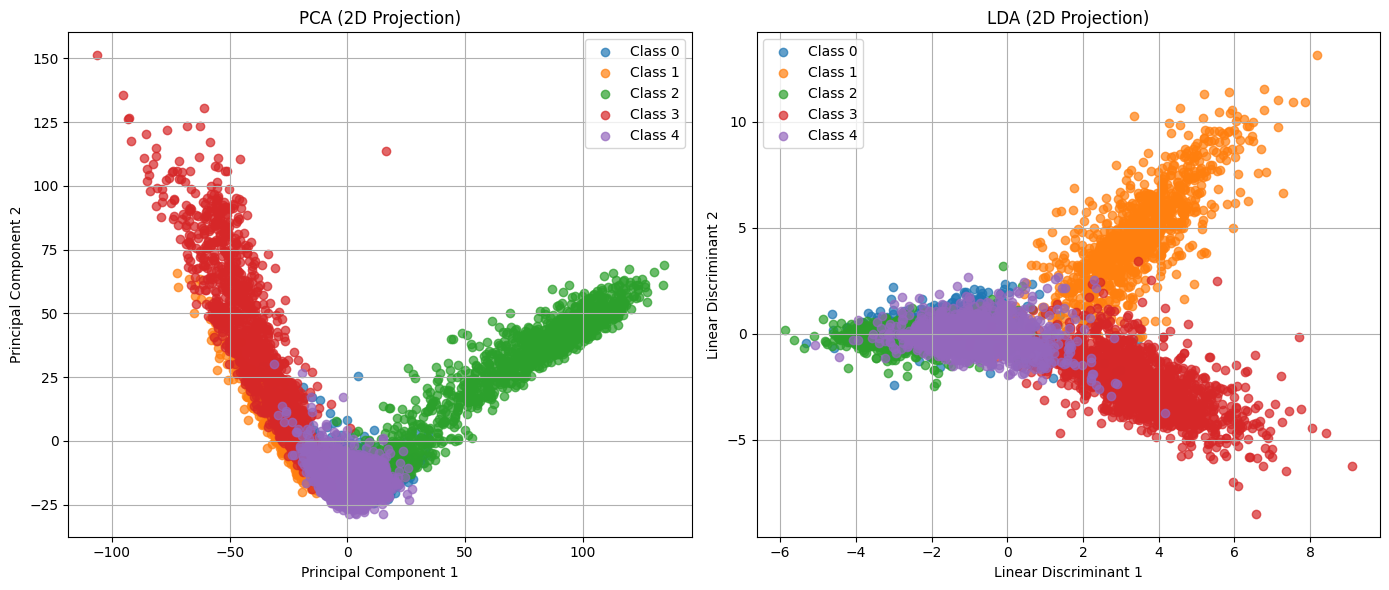

In [20]:
#PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

#LDA to reduce dimensionality to 2
lda = LDA(n_components=2)
embeddings_lda = lda.fit_transform(embeddings, y_test)

#PCA results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
unique_labels = np.unique(y_test)
for label in unique_labels:
    idx = y_test == label
    plt.scatter(embeddings_pca[idx, 0], embeddings_pca[idx, 1], label=f"Class {label}", alpha=0.7)
plt.title("PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

#LDA results
plt.subplot(1, 2, 2)
for label in unique_labels:
    idx = y_test == label
    plt.scatter(embeddings_lda[idx, 0], embeddings_lda[idx, 1], label=f"Class {label}", alpha=0.7)
plt.title("LDA (2D Projection)")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

PCA Plot:

- PCA does not use class labels and aims to capture the maximum variance in the dataset.

- The plot shows overlapping regions between classes, especially in the central area, indicating PCA does not optimize class separation.

- Variance is distributed along Principal Component 1 and Principal Component 2, but class distinction is not pronounced.

LDA Plot:

- LDA optimizes for class separation using class labels, leading to more distinct clusters.

- Classes are more linearly separable, with clear boundaries between groups (e.g., Class 1 and Class 3 are well-separated along Linear Discriminant 1).

- The plot demonstrates better clustering, making it ideal for classification tasks compared to PCA.

- Carry out K-Means on the generated embeddings with 5 clusters and visualize the results by using the resulting clusters as alternate colour mappings for the PCA plot above.

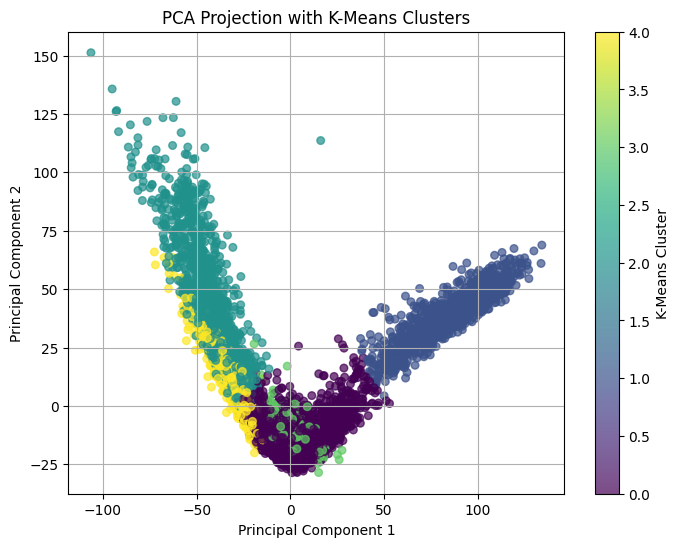

In [22]:
# Apply K-Means with 5 clusters on the embeddings
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize the PCA plot with K-Means clusters as color mapping
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=clusters, cmap='viridis', s=30, alpha=0.7)
plt.colorbar(scatter, label="K-Means Cluster")
plt.title("PCA Projection with K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

- Based on the results seen in the plots, can you guess what are the labels for the given dataset (what each label number represents in terms of the category of clothes)? It might also help to list out a random selection of data entries (the original images) for each cluster and their label value to help understand the patterns each cluster might represent.


Cluster 0
Number of samples: 5906
Labels: [4 2 0 4 0]


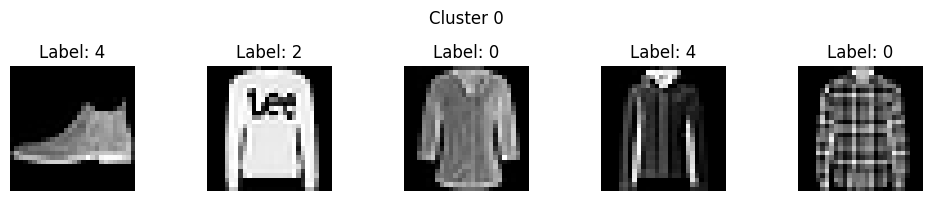


Cluster 1
Number of samples: 860
Labels: [2 2 2 2 2]


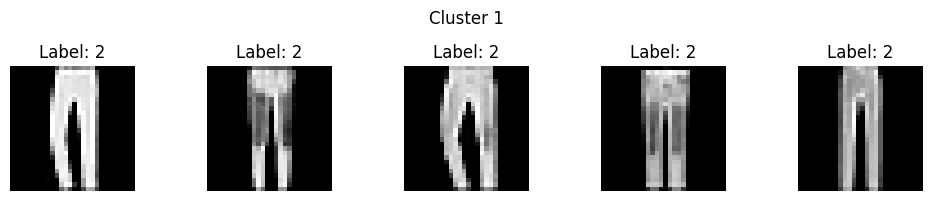


Cluster 2
Number of samples: 1541
Labels: [3 3 3 3 3]


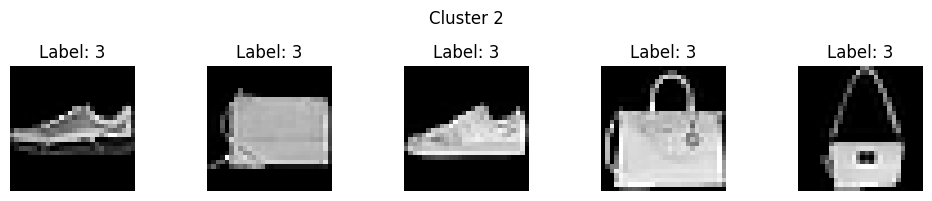


Cluster 3
Number of samples: 806
Labels: [4 4 4 4 4]


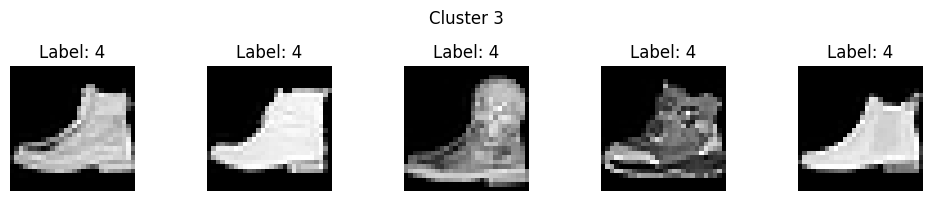


Cluster 4
Number of samples: 887
Labels: [1 1 3 1 4]


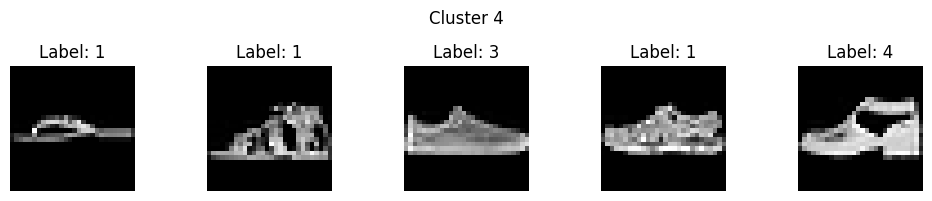

In [24]:
import matplotlib.pyplot as plt

# Function to plot images for each cluster
def plot_cluster_images(cluster, indices, x_data, y_data, num_images=5):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_data[idx]}")
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster}")
    plt.tight_layout() 
    plt.show()

# Plotting images for each cluster
for cluster in np.unique(clusters):
    idx = np.where(clusters == cluster)[0]
    print(f"\nCluster {cluster}")
    print(f"Number of samples: {len(idx)}")
    print(f"Labels: {y_test[idx][:5]}")
    plot_cluster_images(cluster, idx, x_test.values, y_test)

**Observations**

**Cluster 0:**
- The images in this cluster predominantly show items that appear to be shirts or tops.
- Labels are consistent with the visual patterns, indicating this cluster represents a specific category of clothing, likely tops or shirts.

**Cluster 1:**
- The images in this cluster predominantly show items that appear to be trousers or pants.
- Labels are consistent with the visual patterns, indicating this cluster represents a specific category of clothing, likely trousers or pants.

**Cluster 2:**
- The images in this cluster predominantly show items that appear to be shoes and bags.
- Labels are consistent with the visual patterns, indicating this cluster represents categories like shoes and bags.

**Cluster 3:**
- The images in this cluster predominantly show items that appear to be shoes.
- Labels are consistent with the visual patterns, indicating this cluster represents the category of footwear.

**Cluster 4:**
- The images in this cluster predominantly show items that appear to be shoes, slippers, sneakers.
- Labels are consistent with the visual patterns, indicating this cluster represents the category of footwear.

By analyzing the visual patterns and corresponding labels, we can identify the likeliness of categories each cluster represents. This helps in understanding the distribution and characteristics of the dataset.